In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [27]:
df.fillna(df.mean(), inplace=True)

,0
SeniorCitizen,0
tenure,0
PhoneService,0
InternetService,0
OnlineSecurity,0
...,...
StreamingMovies_Yes,0
PaperlessBilling_Yes,0
PaymentMethod_Credit card (automatic),0
PaymentMethod_Electronic check,0


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='InternetService', ylabel='count'>

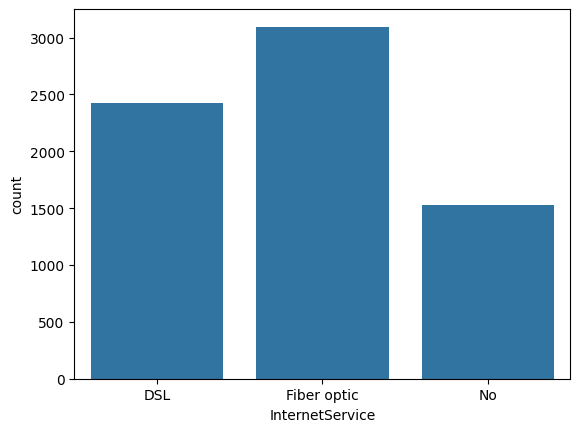

In [9]:
sns.countplot(x=df['InternetService'])

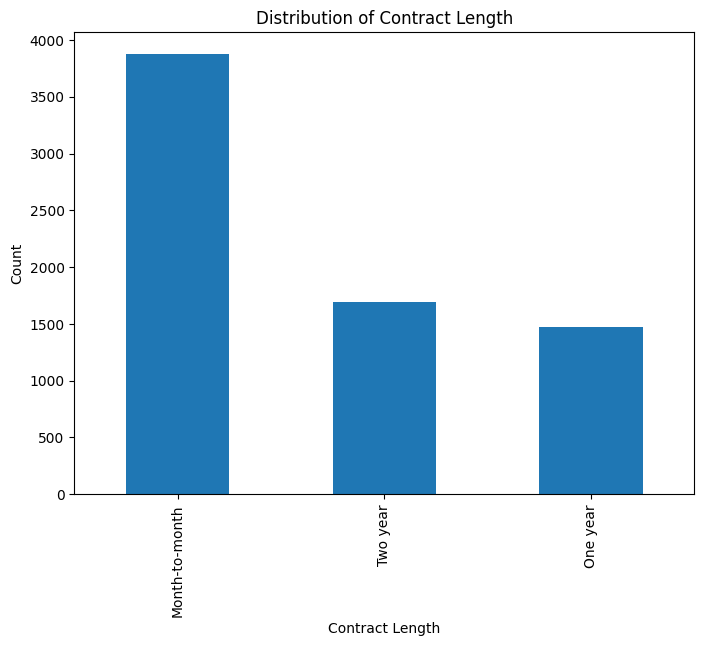

In [10]:
plt.figure(figsize=(8, 6))
df['Contract'].value_counts().plot(kind='bar')
plt.title('Distribution of Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Count')

plt.show()

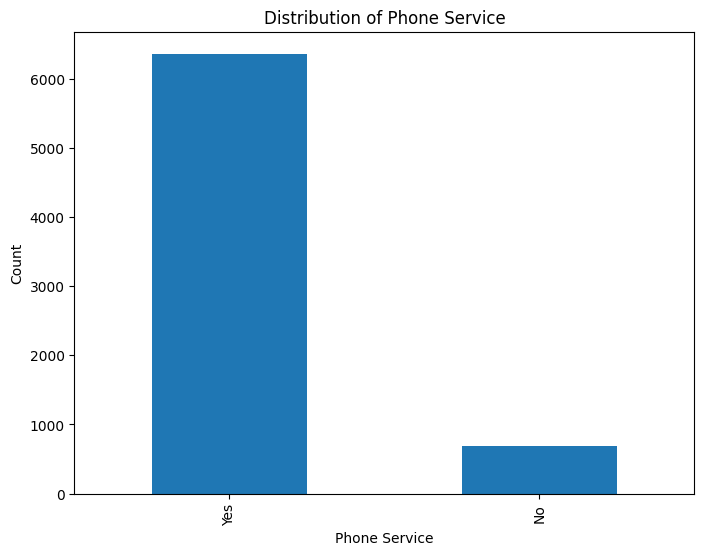

In [11]:
plt.figure(figsize=(8, 6))
df['PhoneService'].value_counts().plot(kind='bar')
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

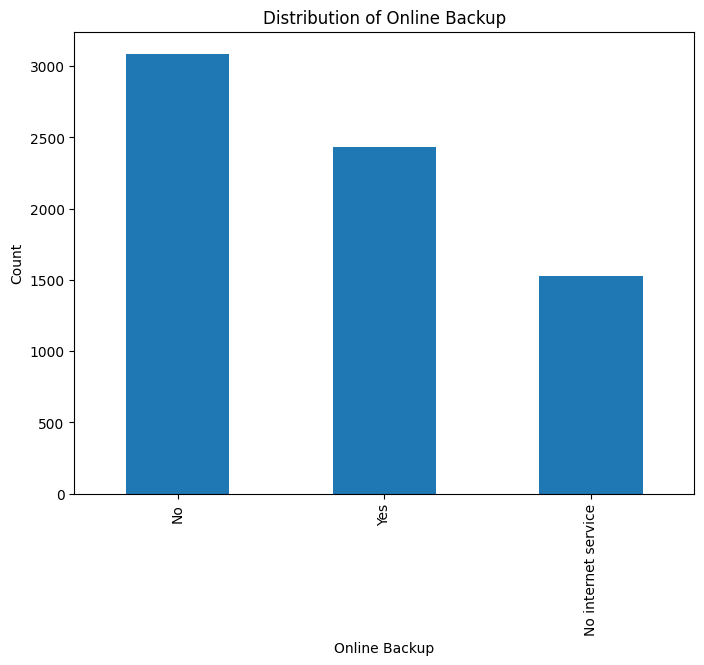

In [12]:
plt.figure(figsize=(8, 6))
df['OnlineBackup'].value_counts().plot(kind='bar')
plt.title('Distribution of Online Backup')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.show()

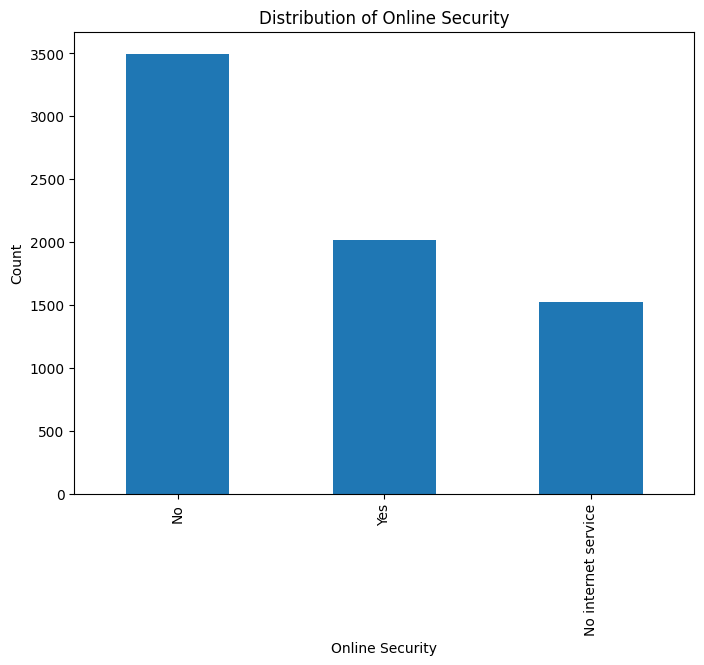

In [13]:
plt.figure(figsize=(8, 6))
df['OnlineSecurity'].value_counts().plot(kind='bar')
plt.title('Distribution of Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()

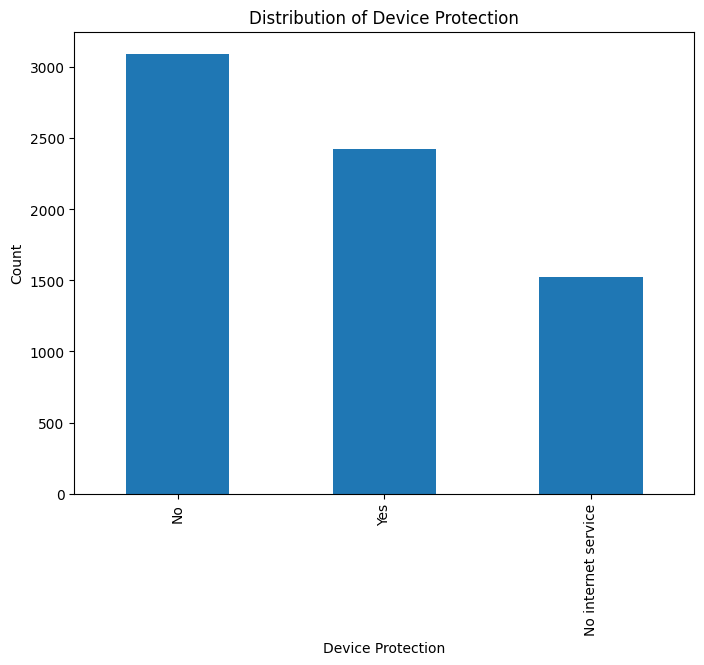

In [14]:
plt.figure(figsize=(8, 6))
df['DeviceProtection'].value_counts().plot(kind='bar')
plt.title('Distribution of Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

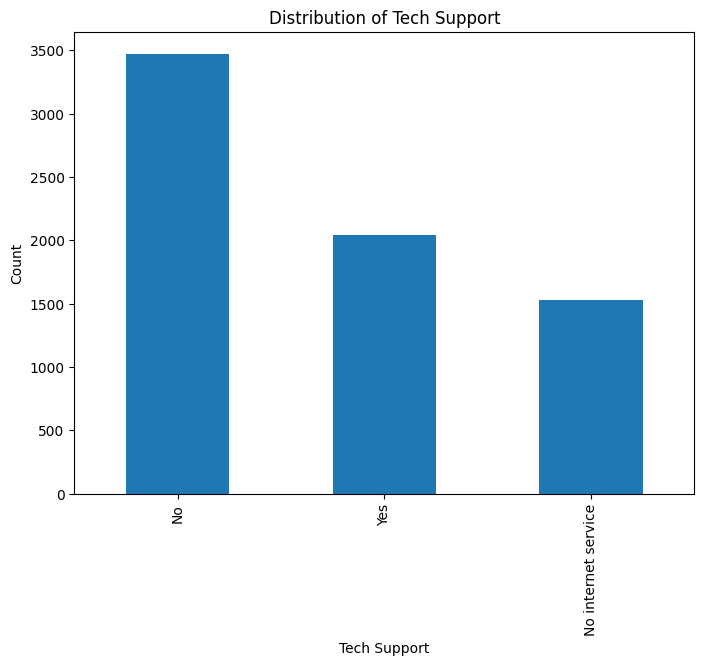

In [15]:
plt.figure(figsize=(8, 6))
df['TechSupport'].value_counts().plot(kind='bar')
plt.title('Distribution of Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

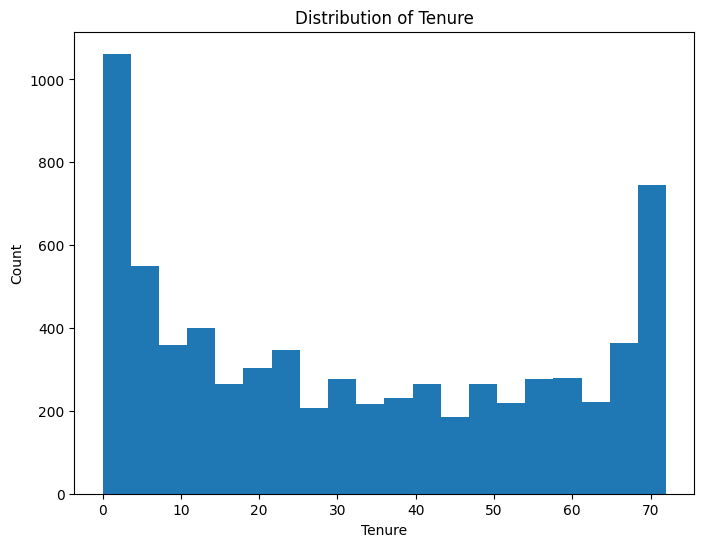

In [16]:
plt.figure(figsize=(8, 6))
df['tenure'].plot(kind='hist', bins=20)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

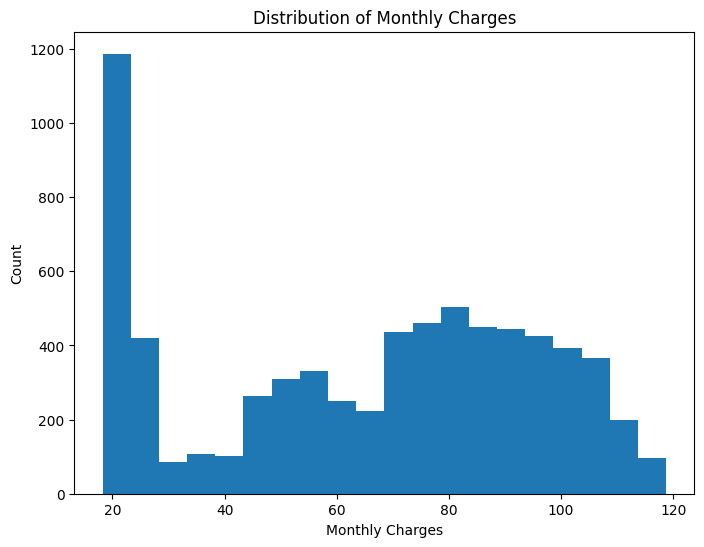

In [17]:
plt.figure(figsize=(8, 6))
df['MonthlyCharges'].plot(kind='hist', bins=20)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

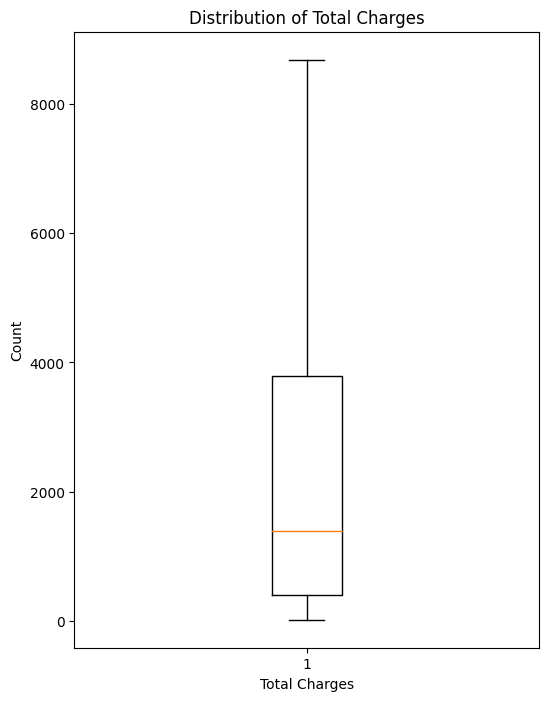

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
plt.figure(figsize=(6, 8))
plt.boxplot(df['TotalCharges'].dropna())
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

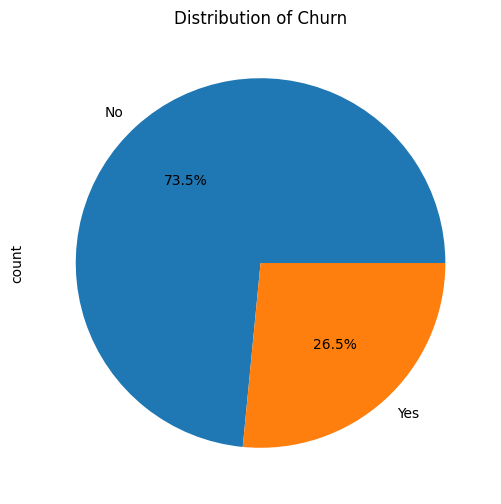

In [19]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Churn')
plt.show()

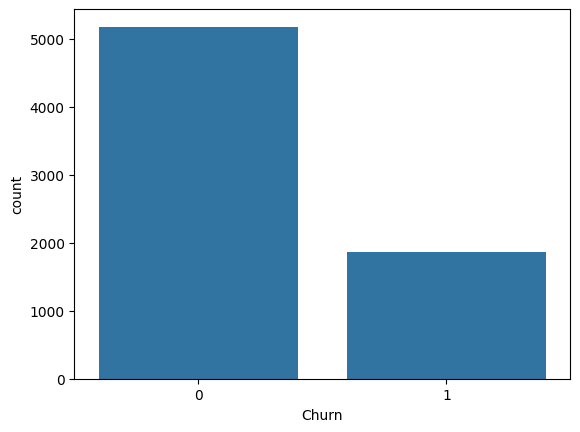

In [20]:
df['Churn']=df.Churn.map({'No':0, 'Yes':1})
sns.countplot(x=df.Churn);


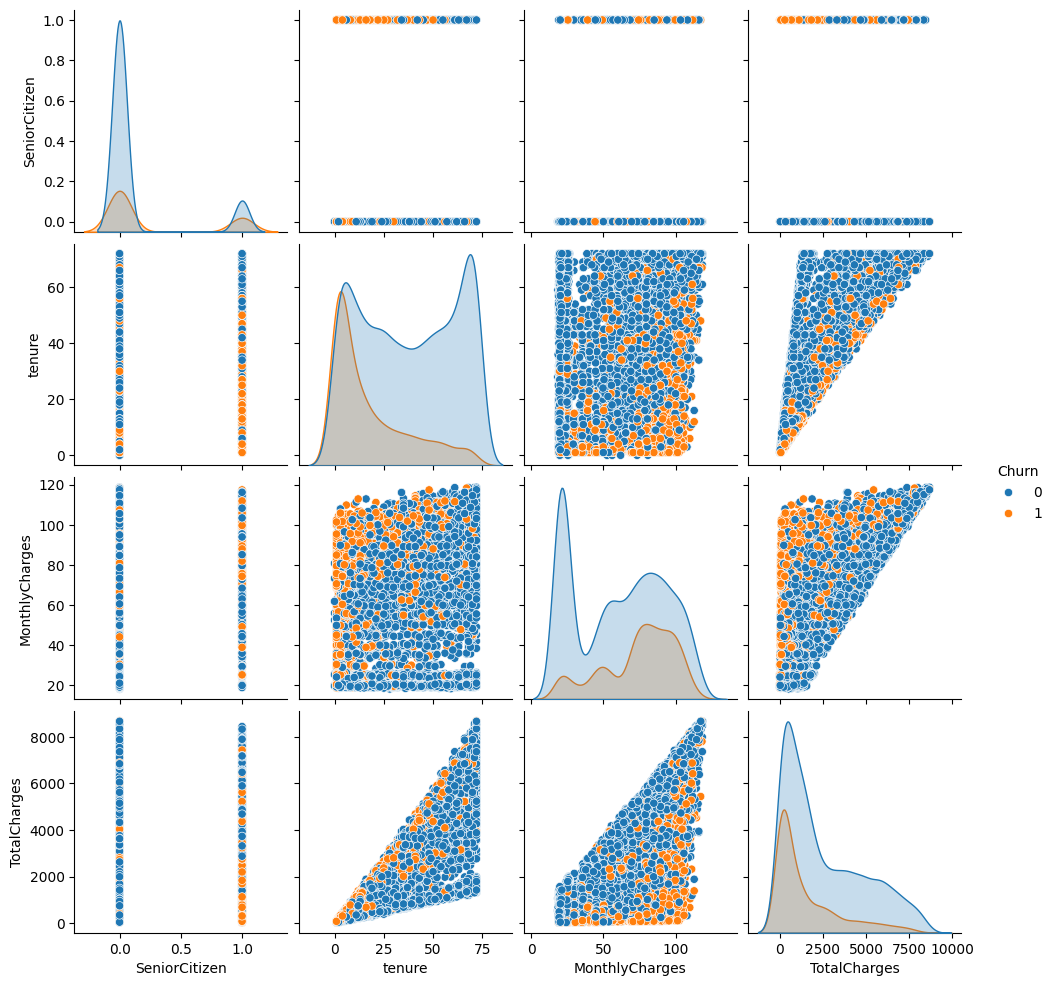

In [21]:
sns.pairplot(df, hue="Churn")

In [22]:
le = LabelEncoder()
arr = ['InternetService', 'Contract', 'PhoneService', 'OnlineBackup', 'OnlineSecurity','DeviceProtection', 'TechSupport']
for col in arr:
    df[col] = le.fit_transform(df[col])

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,0,0,...,0,0,No,No,0,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,No,0,2,...,2,0,No,No,1,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,1,No,0,2,...,0,0,No,No,0,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,0,2,...,2,2,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,1,No,1,0,...,0,0,No,No,0,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,1,Yes,0,2,...,2,2,Yes,Yes,1,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,1,Yes,1,0,...,2,0,Yes,Yes,1,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,0,No phone service,0,2,...,0,0,No,No,0,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,1,Yes,1,0,...,0,0,No,No,0,Yes,Mailed check,74.40,306.60,1


In [30]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = log_reg.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.815471965933286
Precision: 0.677115987460815
Recall: 0.579088471849866
F1 Score: 0.6242774566473989


In [34]:
result = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'], 'Value': [accuracy, precision, recall, f1]})
result

,Metric,Value
0,Accuracy,0.815472
1,Precision,0.677116
2,Recall,0.579088
3,F1 Score,0.624277


In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[933, 103],
       [157, 216]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

